In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker



In [ ]:
df = pd.read_csv('COVID_Parcel_Business.csv')
df

,FakeCustomerID,THE_YEAR,THE_WEEK,VOLUME
0,718117,2021,1,8
1,718117,2020,7,257
2,718117,2019,39,141
3,718117,2018,1,14
4,718117,2021,2,192
...,...,...,...,...
190714,228893,2019,13,30
190715,228893,2019,38,122
190716,228893,2019,48,99
190717,228893,2019,20,61


In [ ]:
# unique FakeCustomerID values
unique_customers_count = df['FakeCustomerID'].nunique()

# unique FakeCustomerID values
print("Number of unique FakeCustomerID:", unique_customers_count)


Number of unique FakeCustomerID: 1061


## **Code Explanation:**
* **unique_customers_count = df['FakeCustomerID'].nunique():** Here, we used this command code for calculates the number of unique values in the 'FakeCustomerID' column of a DataFrame **df**. The **.nunique()** method is used to count the number of unique values in a Series (column in DataFrame).

# Main Business Question

###  How did the COVID-19 pandemic impact ABC Company’s parcel business?

### Impact of the Pandemic: In 2020, there was a noticeable change in the pattern of parcel shipments, with a substantial increase in shipment volumes during certain periods of the year. This surge in parcel shipments aligns closely with the timing of lockdowns and restrictions imposed due to the pandemic, indicating a surge in demand for parcel delivery services as consumers turned to online shopping and remote work arrangements.



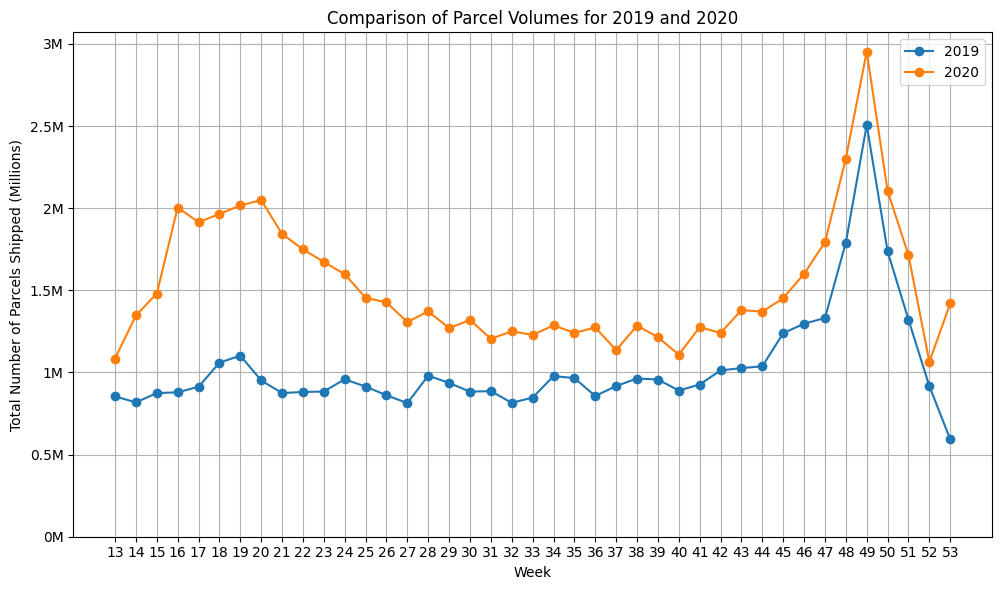

In [ ]:
import matplotlib.pyplot as plt

# Filter data for years 2019 and 2020 and weeks 12 to 53
filtered_data = df[((df['THE_YEAR'] == 2019) | (df['THE_YEAR'] == 2020)) & ((df['THE_WEEK'] >= 13) & (df['THE_WEEK'] <= 53))]

# Aggregate parcel volumes by year
yearly_data = filtered_data.pivot_table(index='THE_WEEK', columns='THE_YEAR', values='VOLUME', aggfunc='sum')

# Convert parcel volumes to millions
yearly_data /= 1000000  # divide by 1,000,000 to convert to millions

# Plot yearly shipping data trend with year on x-axis and parcel volumes on y-axis
plt.figure(figsize=(10, 6))

plt.plot(yearly_data.index, yearly_data[2019], marker='o', linestyle='-', label='2019')
plt.plot(yearly_data.index, yearly_data[2020], marker='o', linestyle='-', label='2020')

plt.title('Comparison of Parcel Volumes for 2019 and 2020')
plt.xlabel('Week')
plt.ylabel('Total Number of Parcels Shipped (Millions)')
plt.xticks(yearly_data.index)  # Set x-axis ticks to represent weeks
plt.legend()
plt.grid(True)
plt.tight_layout()

# Manually set y-axis ticks to include the desired values
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3], ['0M', '0.5M', '1M', '1.5M', '2M', '2.5M', '3M'])

plt.show()


# **Code explanation:**
*  The code first filters the DataFrame **df** to include only data for years 2019 and 2020 and weeks 13 to 53.
* It then aggregates parcel volumes by week and year using the **pivot_table()** function. This function creates a pivot table with weeks as rows, years as columns, and parcel volumes as values, summed over each combination of week and year.
* The parcel volumes are then divided by 1,000,000 to convert them to millions.
* Matplotlib is used to create the plot. It sets up the figure size, plots the parcel volumes for each year using **plt.plot()**, sets titles and labels for the plot, adds a legend, and adjusts the layout.
*  The code sets the x-axis ticks to represent weeks using **plt.xticks()** and manually sets the y-axis ticks to include specific values representing millions of parcels shipped.

## Additional Business Questions


### (1) When were customer volumes first impacted by COVID-19?

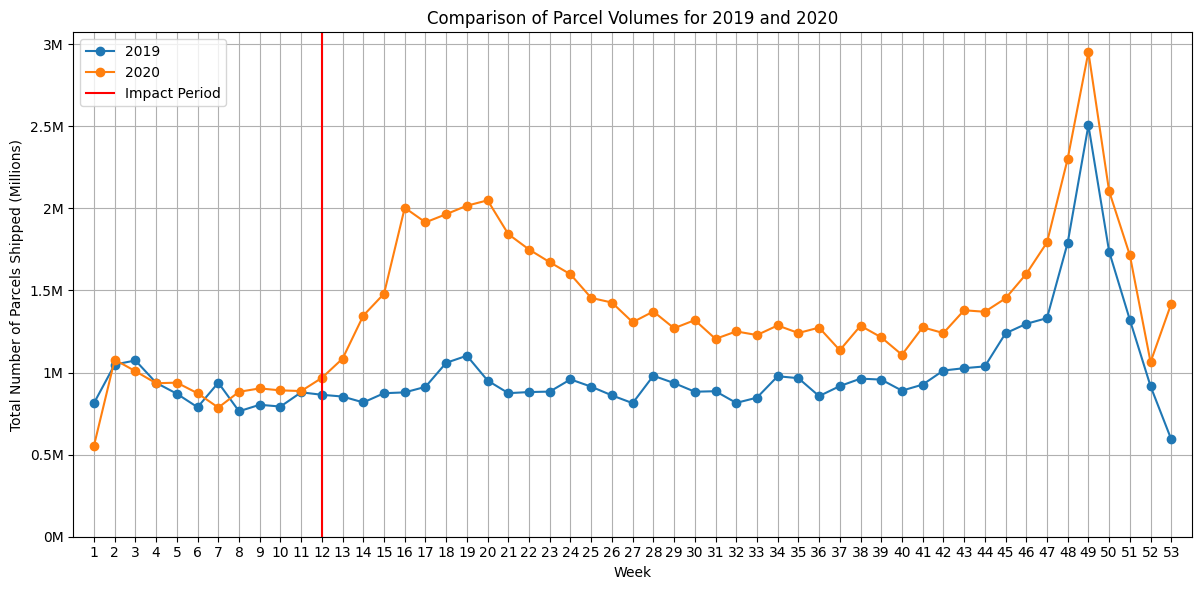

In [ ]:
import matplotlib.pyplot as plt

# Filter data for years 2019 and 2020 and weeks 1 to 53
filtered_data = df[((df['THE_YEAR'] == 2019) | (df['THE_YEAR'] == 2020)) & ((df['THE_WEEK'] >= 1) & (df['THE_WEEK'] <= 53))]

# Aggregate parcel volumes by year
yearly_data = filtered_data.pivot_table(index='THE_WEEK', columns='THE_YEAR', values='VOLUME', aggfunc='sum')

# Convert parcel volumes to millions
yearly_data /= 1000000  # divide by 1,000,000 to convert to millions

# Plot yearly shipping data trend with year on x-axis and parcel volumes on y-axis
plt.figure(figsize=(12, 6))

plt.plot(yearly_data.index, yearly_data[2019], marker='o', linestyle='-', label='2019')
plt.plot(yearly_data.index, yearly_data[2020], marker='o', linestyle='-', label='2020')

# Add a straight line indicating the impact period
plt.axvline(x=12, color='red', linestyle='-', linewidth=1.5, label='Impact Period')

plt.title('Comparison of Parcel Volumes for 2019 and 2020')
plt.xlabel('Week')
plt.ylabel('Total Number of Parcels Shipped (Millions)')

# Set x-axis limits with extra space
plt.xlim(yearly_data.index.min() - 1, yearly_data.index.max() + 1)

plt.xticks(yearly_data.index)  # Set x-axis ticks to represent weeks
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3], ['0M', '0.5M', '1M', '1.5M', '2M', '2.5M', '3M'])

plt.show()


# **Code explanation**

* The code starts by importing the **matplotlib.pyplot** library, typically used for plotting data.
* The data is filtered to include only the years 2019 and 2020 and weeks 1 to 53.
* The filtered data is then aggregated by week and year, summing up the parcel volumes for each combination of week and year.
* The parcel volumes are divided by 1,000,000 to convert them to millions.
*  The code sets up a plot using **plt.figure(figsize=(12, 6))**, which creates a figure with a size of 12 inches by 6 inches.
* Two lines are plotted on the same graph using **plt.plot()**. One line represents the parcel volumes for 2019, and the other represents the parcel volumes for 2020. The **marker='o'** argument adds circular markers at each data point, and **linestyle='-'** specifies solid lines connecting the points.
* A vertical line is added to indicate the "Impact Period," presumably a period of significant events or changes affecting parcel volumes. The line is placed at week 12 (x=12) and is colored red.
* Titles and labels for the x-axis and y-axis are added using **plt.title(), plt.xlabel(), and plt.ylabel()**.
* A legend is added to the plot to distinguish between the data for 2019 and 2020.
* Gridlines are added to the plot using **plt.grid(True)**.
* **plt.tight_layout()** is used to adjust the layout of the plot to prevent overlapping elements.
* The y-axis ticks are manually set to include specific values from 0 to 3 million parcels shipped.

### (2)	What events within the COVID timeline may have contributed to the change?

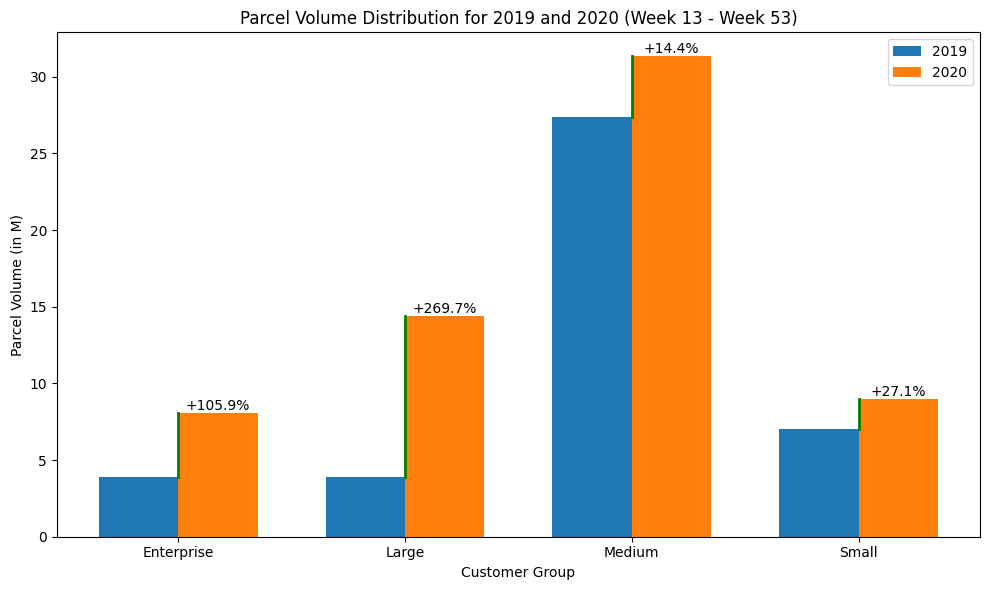

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define conditions and corresponding customer groups
conditions = [
    (df['VOLUME'] > 500000),
    (df['VOLUME'] >= 200000) & (df['VOLUME'] <= 500000),
    (df['VOLUME'] >= 10000) & (df['VOLUME'] < 200000),
    (df['VOLUME'] >= 1000) & (df['VOLUME'] < 10000)
]
customer_groups = ['Enterprise', 'Large', 'Medium', 'Small']

# Create 'Customer_Group' column based on conditions
df['Customer_Group'] = pd.Series(pd.Categorical.from_codes(
    np.select(conditions, range(len(customer_groups))), categories=customer_groups
))

# Filter the data for the years 2019 and 2020 and weeks 13 to 53
filtered_data_2019 = df[(df['THE_YEAR'] == 2019) & (df['THE_WEEK'] >= 13) & (df['THE_WEEK'] <= 53)]
filtered_data_2020 = df[(df['THE_YEAR'] == 2020) & (df['THE_WEEK'] >= 13) & (df['THE_WEEK'] <= 53)]

# Group by customer group and calculate total parcel volumes for 2019 and 2020
volumes_2019 = filtered_data_2019.groupby('Customer_Group')['VOLUME'].sum() / 1000000  # Convert to millions
volumes_2020 = filtered_data_2020.groupby('Customer_Group')['VOLUME'].sum() / 1000000  # Convert to millions

# Calculate percentage increase
percentage_increase = ((volumes_2020 - volumes_2019) / volumes_2019) * 100

# Plot bar graph
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(customer_groups))

bars1 = ax.bar(index, volumes_2019, bar_width, label='2019')
bars2 = ax.bar(index + bar_width, volumes_2020, bar_width, label='2020')

# Add lines to indicate increase or decrease
for i, (v1, v2) in enumerate(zip(volumes_2019, volumes_2020)):
    if v2 > v1:
        ax.plot([index[i] + bar_width / 2, index[i] + bar_width / 2], [v1, v2], color='green', linestyle='-', linewidth=2)
    elif v2 < v1:
        ax.plot([index[i] + bar_width / 2, index[i] + bar_width / 2], [v1, v2], color='red', linestyle='-', linewidth=2)

ax.set_xlabel('Customer Group')
ax.set_ylabel('Parcel Volume (in M)')
ax.set_title('Parcel Volume Distribution for 2019 and 2020 (Week 13 - Week 53)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(customer_groups)
ax.legend()

# Annotate bars with percentage increase
for i, v in enumerate(percentage_increase):
    ax.text(bars2[i].get_x() + bars2[i].get_width() / 2, bars2[i].get_height(), f'+{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# **Code explanation**

* **conditions:** By using this code it create a list of conditions based on the parcel volume. It categorizes the volumes into four groups: Enterprise, Large, Medium, and Small.
* **customer_groups:** This is a list containing the names of the customer groups corresponding to the conditions.
* Data is filtered to include only weeks 13 to 53 for both 2019 and 2020.
* Parcel volumes are grouped by customer group for both 2019 and 2020, and the total volumes are calculated. The volumes are then converted to millions for easier visualization.
* **Percentage increase in parcel volumes from 2019 to 2020 is calculated for each customer group.**
* Lines are added to indicate whether there's an increase (green) or decrease (red) in volume from 2019 to 2020.

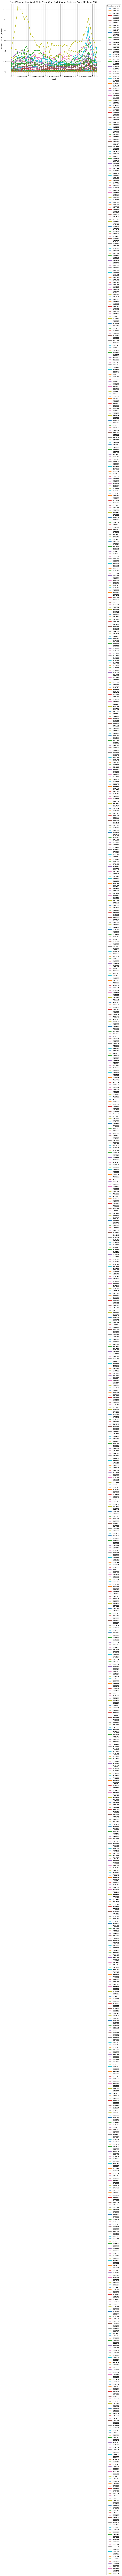

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("COVID_Parcel_Business.csv")

# Filter the data for the years 2019 and 2020 and weeks 13 to 53
filtered_data = df[((df['THE_YEAR'] == 2019) | (df['THE_YEAR'] == 2020)) & ((df['THE_WEEK'] >= 13) & (df['THE_WEEK'] <= 53))]

# Aggregate parcel volumes by week, year, and customer ID
customer_weekly_data = filtered_data.groupby(['FakeCustomerID', 'THE_YEAR', 'THE_WEEK'])['VOLUME'].sum() / 1000000  # Convert to millions

# Plot the line graph for each unique customer
plt.figure(figsize=(12, 8))  # Adjust the figure size
for customer_id, data in customer_weekly_data.groupby(level='FakeCustomerID'):
    plt.plot(data.index.get_level_values('THE_WEEK'), data.values, marker='o', label=str(customer_id))

plt.title('Parcel Volumes from Week 13 to Week 53 for Each Unique Customer (Years 2019 and 2020)')
plt.xlabel('Week')
plt.ylabel('Total Parcel Volume (Millions)')
plt.xticks(range(13, 54))  # Week numbers from 13 to 53
plt.grid(True)
plt.legend(title='FakeCustomerID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(right=0.8)  # Adjust the right margin
plt.show()


### (3) How did COVID-19 impact peak season in 2020?

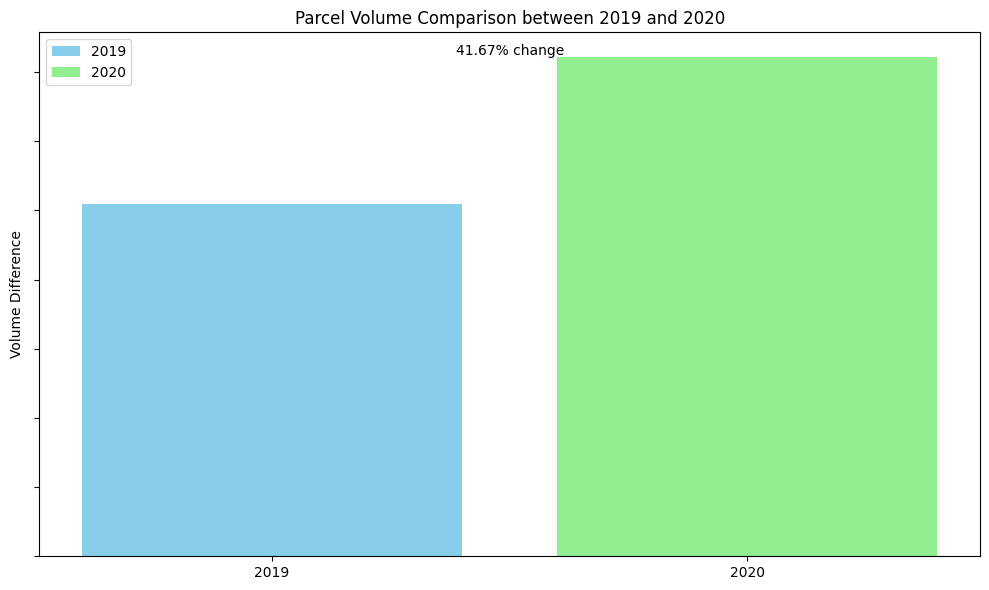

Percentage difference in parcel volume between 2019 and 2020: 41.67 %


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("COVID_Parcel_Business.csv")

# Filter the data for the specified periods in 2019 and 2020
data_2019 = df[((df['THE_YEAR'] == 2019) & ((df['THE_WEEK'] >= 45) | (df['THE_YEAR'] == 2020) & (df['THE_WEEK'] <= 4)))]
data_2020 = df[((df['THE_YEAR'] == 2020) & ((df['THE_WEEK'] >= 45) | ((df['THE_WEEK'] == 2021) | (df['THE_WEEK'] <= 2))))]

# Calculate total parcel volumes for the specified periods
total_volume_2019 = data_2019['VOLUME'].sum() / 1000000  # Convert to millions
total_volume_2020 = data_2020['VOLUME'].sum() / 1000000  # Convert to millions

# Calculate the percentage difference
percentage_difference = ((total_volume_2020 - total_volume_2019) / total_volume_2019) * 100

# Plot the bar graph
plt.figure(figsize=(10, 6))

# Plot bar for 2019
plt.bar('2019', total_volume_2019, color='skyblue', label='2019')

# Plot bar for 2020
plt.bar('2020', total_volume_2020, color='lightgreen', label='2020')

# Add labels and title
plt.title('Parcel Volume Comparison between 2019 and 2020')
plt.ylabel('Volume Difference')  # Remove y-axis label

# Remove y-axis tick labels
plt.gca().yaxis.set_ticklabels([])

# Show legend
plt.legend()

# Show percentage difference on the plot
plt.text(0.5, total_volume_2020 + 0.1, f'{percentage_difference:.2f}% change', ha='center')

# Set y-axis ticks

plt.tight_layout()
plt.show()

# Print the percentage difference
print("Percentage difference in parcel volume between 2019 and 2020:", round(percentage_difference, 2), "%")


# **Code explanation**

* Data for the specified periods in 2019 and 2020 are filtered using boolean indexing.
* For 2019, data from week 45 onwards and week 1 to week 4 of 2020 are included.
* For 2020, data from week 45 onwards and week 1 to week 2 of 2021 (apparently a typo, should be **df['THE_WEEK'] == 1**) are included.
* The percentage difference in parcel volume between 2020 and 2019 is calculated using the formula which is given in file.
* A bar graph is created using **plt.figure(figsize=(10, 6))** to set the figure size.
Two bars are plotted for 2019 and 2020 using **plt.bar()** with labels '2019' and '2020'.
* The y-axis label is set as 'Volume Difference'.
* Y-axis tick labels are removed using **plt.gca().yaxis.set_ticklabels([]**) to avoid redundant labels.
* A legend is displayed using **plt.legend()**.
* The percentage difference is displayed on the plot using **plt.text()**.
* It is positioned at the center of the bar for 2020, slightly above the bar.
* **plt.tight_layout()** ensures that all plot elements fit properly.

# The Impact of COVID on Customer Segments:

### (1) How has COVID affected companies in the different customer groups (Enterprise, Large, etc.)?

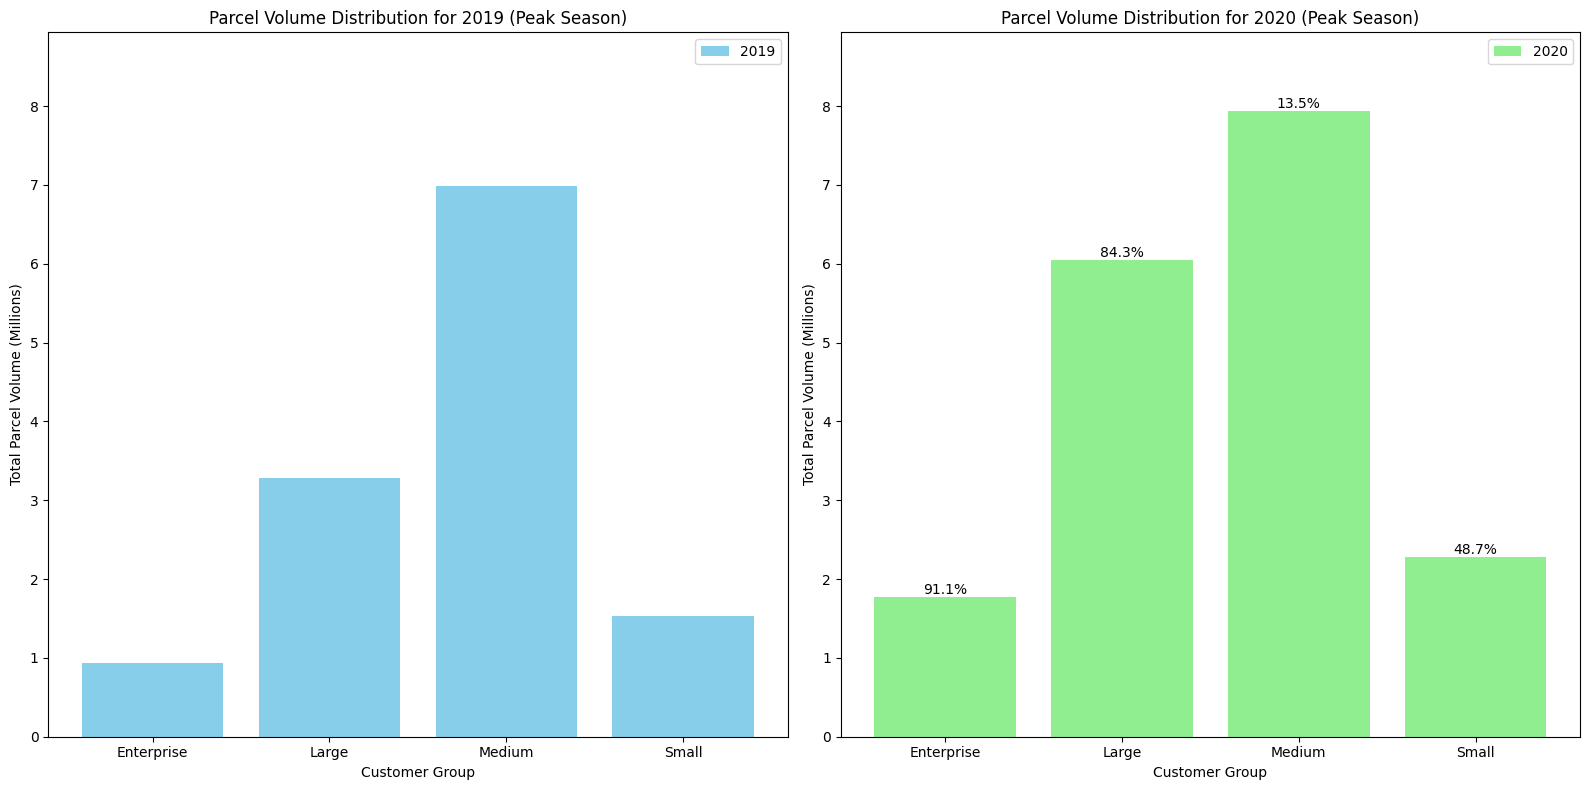

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("COVID_Parcel_Business.csv")

# Define conditions and corresponding customer groups
conditions = [
    (df['VOLUME'] > 500000),
    (df['VOLUME'] >= 200000) & (df['VOLUME'] <= 500000),
    (df['VOLUME'] >= 10000) & (df['VOLUME'] < 200000),
    (df['VOLUME'] >= 1000) & (df['VOLUME'] < 10000)
]
customer_groups = ['Enterprise', 'Large', 'Medium', 'Small']

# Create 'Customer_Group' column based on conditions
df['Customer_Group'] = pd.Series(pd.Categorical.from_codes(
    np.select(conditions, range(len(customer_groups))), categories=customer_groups
))


# Filter the data for the specified periods in 2019 and 2020
filtered_data_2019 = df[((df['THE_YEAR'] == 2019) & ((df['THE_WEEK'] >= 45) | (df['THE_YEAR'] == 2020) & (df['THE_WEEK'] <= 4)))]
filtered_data_2020 = df[((df['THE_YEAR'] == 2020) & ((df['THE_WEEK'] >= 45) | ((df['THE_WEEK'] == 2021) | (df['THE_WEEK'] <= 2))))]


# Group by customer group and calculate total parcel volumes for 2019 and 2020
volumes_2019 = filtered_data_2019.groupby('Customer_Group')['VOLUME'].sum() / 1000000
volumes_2020 = filtered_data_2020.groupby('Customer_Group')['VOLUME'].sum() / 1000000

# Calculate percentage change for each customer group
percentage_change = ((volumes_2020 - volumes_2019) / volumes_2019) * 100

# Determine the maximum total parcel volume between both years
max_volume = max(volumes_2019.max(), volumes_2020.max())

# Plot two bar graphs side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot bar graph for 2019
bars1 = axs[0].bar(volumes_2019.index, volumes_2019, color='skyblue', label='2019')

# Plot bar graph for 2020
bars2 = axs[1].bar(volumes_2020.index, volumes_2020, color='lightgreen', label='2020')

# Set the same y-axis limits for both plots
for ax in axs:
    ax.set_ylim(0, max_volume + 1)

# Add percentage change labels on each bar
for bar, change in zip(bars2, percentage_change):
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2, height, f'{change:.1f}%', ha='center', va='bottom', fontsize=10)

# Add labels and title for the first graph
axs[0].set_title('Parcel Volume Distribution for 2019 (Peak Season)')
axs[0].set_xlabel('Customer Group')
axs[0].set_ylabel('Total Parcel Volume (Millions)')
axs[0].legend()

# Add labels and title for the second graph
axs[1].set_title('Parcel Volume Distribution for 2020 (Peak Season)')
axs[1].set_xlabel('Customer Group')
axs[1].set_ylabel('Total Parcel Volume (Millions)')
axs[1].legend()

plt.tight_layout()
plt.show()


# **Code explanation:**
* A figure with two subplots (side by side) is created using **plt.subplots(1, 2, figsize=(16, 8))**
* Bar graphs are plotted for 2019 and 2020, respectively.
* Bars are colored differently for each year.
* Y-axis limits are set to ensure both plots have the same scale.
* Percentage change labels are added on each bar for 2020.
* **plt.tight_layout()** ensures that all plot elements fit properly.
* **for bar, change in zip(bars2, percentage_change)::** This is a loop that iterates over each bar in bars2 and its corresponding percentage change value from percentage_change.
* **zip()** function is used to iterate over both lists simultaneously, pairing each bar with its corresponding percentage change value.
* **axs[1].text(bar.get_x() + bar.get_width() / 2, height, f'{change:.1f}%', ha='center', va='bottom', fontsize=10):**This line adds a text label to the current bar.
* **bar.get_x() + bar.get_width() / 2** calculates the x-coordinate for the center of the bar. This positions the label at the center of the bar horizontally.
* **height** is used as the y-coordinate for the label, positioning it just above the top of the bar.
* **f'{change:.1f}%'** formats the percentage change value with one decimal place followed by a percentage sign ('%').


### (2) What percent of each customer group is growing, moderately growing, and declining during the COVID observation period?

In [ ]:
# Load the dataset
df = pd.read_csv("COVID_Parcel_Business_with_Growth.csv")

filtered_data_2020 = df[(df['THE_YEAR'] == 2020) & (df['THE_WEEK'] >= 1) & (df['THE_WEEK'] <= 12)]
filtered_data_2019 = df[(df['THE_YEAR'] == 2019) & (df['THE_WEEK'] >= 1) & (df['THE_WEEK'] <= 12)]

# Group by Customer_Group and calculate total volume for each group
total_volume_per_group_2020 = filtered_data_2020.groupby('Customer_Group')['VOLUME'].sum()
total_volume_per_group_2019 = filtered_data_2019.groupby('Customer_Group')['VOLUME'].sum()

# Calculate percentage change for each customer group compared to 2019
percentage_change_2020_vs_2019 = ((total_volume_per_group_2020 - total_volume_per_group_2019) / total_volume_per_group_2019) * 100

# Define function to classify growth
def classify_growth(percentage_change):
    if percentage_change >20:
        return "Growing"
    elif percentage_change < 0:
        return "Declining"
    elif percentage_change < 10:
        return "Moderately_growing"
    else:
        return "No Change"

# Classify growth for 2020
growth_2020 = percentage_change_2020_vs_2019.apply(classify_growth)

# Display the results
print("Customer groups categorized by growth for 2020 compared to 2019:")
for group, growth in growth_2020.items():
    print(f"  - {group}: {growth} (Percentage change vs 2019 = {percentage_change_2020_vs_2019[group]:.3f}%)")

print(percentage_change_2020_vs_2019)

Customer groups categorized by growth for 2020 compared to 2019:
  - Enterprise: Moderately_growing (Percentage change vs 2019 = 4.317%)
  - Large: Growing (Percentage change vs 2019 = 132.809%)
  - Medium: Declining (Percentage change vs 2019 = -8.490%)
  - Small: Moderately_growing (Percentage change vs 2019 = 2.699%)
Customer_Group
Enterprise      4.317332
Large         132.808574
Medium         -8.489640
Small           2.699294
Name: VOLUME, dtype: float64


# **Code explanation:**
* Data for weeks 1 to 12 of the years 2020 and 2019 are filtered separately using boolean indexing, and the filtered data is stored in **filtered_data_2020** and **filtered_data_2019**, respectively.
* The total parcel volume for each customer group is calculated separately for the years 2020 and 2019 using the **groupby()** method followed by **sum()**. The results are stored in **total_volume_per_group_2020** and **total_volume_per_group_2019**.
* A function named **classify_growth()** is defined to classify the growth status based on the percentage change.
* If the percentage change is greater than 20%, it's classified as "Growing".
* If the percentage change is less than 0%, it's classified as "Declining".
* If the percentage change is less than 10%, it's classified as "Moderately Growing".
* Otherwise, it's classified as "No Change".
* The function **classify_growth()** is applied to the percentage change data for 2020 (**percentage_change_2020_vs_2019**), resulting in a new Series **growth_2020** containing the growth classifications for each customer group.

# ISGR_PORTION

In [ ]:
# Read the CSV file
df = pd.read_csv("COVID_Parcel_Business_with_Growth.csv")

# Filter the data for the current period (week 1 to week 12, 2019)
current_period_data = df[(df['THE_YEAR'] == 2019) & (df['THE_WEEK'] >= 1) & (df['THE_WEEK'] <= 12)]

# Filter the data for the previous period (week 1 to week 12, 2020)
previous_period_data = df[(df['THE_YEAR'] == 2020) & (df['THE_WEEK'] >= 1) & (df['THE_WEEK'] <= 12)]

# Group the data by customer ID and calculate the total volume for each customer
current_period_total_volume = current_period_data.groupby('FakeCustomerID')['VOLUME'].sum()
previous_period_total_volume = previous_period_data.groupby('FakeCustomerID')['VOLUME'].sum()

# Calculate the ISGR percentage for each customer
ISGR_before= ((current_period_total_volume - previous_period_total_volume) / previous_period_total_volume) * 100


In [ ]:
# Filter the data for the current period (week 13 to week 52, 2019)
current_period_data = df[(df['THE_YEAR'] == 2019) & (df['THE_WEEK'] >= 13) & (df['THE_WEEK'] <= 52)]

# Filter the data for the previous period (week 13 to week 52, 2020)
previous_period_data = df[(df['THE_YEAR'] == 2020) & (df['THE_WEEK'] >= 13) & (df['THE_WEEK'] <= 52)]

# Group the data by customer ID and calculate the total volume for each customer
current_period_total_volume = current_period_data.groupby('FakeCustomerID')['VOLUME'].sum()
previous_period_total_volume = previous_period_data.groupby('FakeCustomerID')['VOLUME'].sum()

# Calculate the ISGR percentage for each customer
ISGR_after= ((current_period_total_volume - previous_period_total_volume) / previous_period_total_volume) * 100


In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("COVID_Parcel_Business_with_Growth.csv")

# Filter the data for the current period (week 1 to week 12, 2019)
current_period_data_2019 = df[(df['THE_YEAR'] == 2019) & (df['THE_WEEK'] >= 1) & (df['THE_WEEK'] <= 12)]

# Filter the data for the previous period (week 1 to week 12, 2020)
previous_period_data_2020 = df[(df['THE_YEAR'] == 2020) & (df['THE_WEEK'] >= 1) & (df['THE_WEEK'] <= 12)]

# Group the data by customer ID and calculate the total volume for each customer for 2019
current_period_total_volume_2019 = current_period_data_2019.groupby('FakeCustomerID')['VOLUME'].sum()
previous_period_total_volume_2020 = previous_period_data_2020.groupby('FakeCustomerID')['VOLUME'].sum()

# Calculate the ISGR percentage for each customer for 2019
ISGR_before = ((current_period_total_volume_2019 - previous_period_total_volume_2020) / previous_period_total_volume_2020) * 100

# Filter the data for the current period (week 13 to week 52, 2019)
current_period_data_2019 = df[(df['THE_YEAR'] == 2019) & (df['THE_WEEK'] >= 13) & (df['THE_WEEK'] <= 52)]

# Filter the data for the previous period (week 13 to week 52, 2020)
previous_period_data_2020 = df[(df['THE_YEAR'] == 2020) & (df['THE_WEEK'] >= 13) & (df['THE_WEEK'] <= 52)]

# Group the data by customer ID and calculate the total volume for each customer for 2019
current_period_total_volume_2019 = current_period_data_2019.groupby('FakeCustomerID')['VOLUME'].sum()
previous_period_total_volume_2020 = previous_period_data_2020.groupby('FakeCustomerID')['VOLUME'].sum()

# Calculate the ISGR percentage for each customer for 2020
ISGR_after = ((current_period_total_volume_2019 - previous_period_total_volume_2020) / previous_period_total_volume_2020) * 100

# Merge ISGR_before and ISGR_after DataFrames
ISGR_comparison = pd.concat([ISGR_before, ISGR_after], axis=1, keys=['ISGR_before', 'ISGR_after'])

# Calculate the difference between ISGR_before and ISGR_after
ISGR_comparison['Difference'] = ISGR_comparison['ISGR_after'] - ISGR_comparison['ISGR_before']

# Save the results to a CSV file
ISGR_comparison.to_csv('ISGR_comparison.csv')

# Print the comparison DataFrame
print(ISGR_comparison)


                ISGR_before    ISGR_after  Difference
FakeCustomerID                                       
100771           -14.393939      6.030151   20.424090
102180            42.669173      4.154026  -38.515147
102643             2.529511     85.843102   83.313591
102750            49.489796    244.497608  195.007812
103308           -23.521271    -10.098039   13.423232
...                     ...           ...         ...
239408                  NaN    -64.291870         NaN
407748                  NaN   1036.118598         NaN
480592                  NaN           NaN         NaN
843144                  NaN     10.882957         NaN
904643                  NaN  67600.000000         NaN

[1061 rows x 3 columns]


# **Code Explanation:**

* Data for **weeks 1 to 12** of the years **2019 and 2020** are filtered separately using boolean indexing.
* The filtered data for 2019 is stored in **current_period_data_2019**, and for 2020 in **previous_period_data_2020**.
* **ISGR** (Index of Share Growth Rate) percentage is calculated for each customer for both years using the formula:
* This calculation is performed separately for the current and previous periods of both years.
* The ISGR percentages for the current and previous periods of both years are concatenated along the columns axis using **pd.concat()** to create a single DataFrame named **ISGR_comparison**.
* The difference between the ISGR percentages for the before and after periods is calculated and stored in a new column named 'Difference' within the **ISGR_comparison** DataFrame.

# ISGR_END-------------

# High_Growth

In [ ]:
# Load the data
data = pd.read_csv("Calculated_ISGR.csv")

# Filter the data for the specific period (Week 12, 2020 to Week 53, 2020)
specific_period_data = data[(data['THE_YEAR'] == 2020) & (data['THE_WEEK'] >= 12) & (data['THE_WEEK'] <= 53)]

# Calculate ISGR for the specific period
specific_period_isgr = (specific_period_data['ISGR_after'] - specific_period_data['ISGR_before']) * 100
specific_period_isgr.name = 'ISGR_specified_period'  # Assign a name to the Series

# Merge ISGR for the specific period with the original data
merged_data = pd.merge(data, specific_period_isgr, left_on='FakeCustomerID', right_index=True, suffixes=('', '_specified_period'))

# Compare ISGR for the specific period with the Difference column
merged_data['ISGR_difference'] = merged_data['Difference'] - merged_data['ISGR_after']

# Define threshold value for significant change
threshold = 60

# Identify high-growth customers based on the threshold
high_growth_customers = merged_data[merged_data['ISGR_difference'] > threshold]

high_growth_customers.count()

Unnamed: 0               167
FakeCustomerID           167
THE_YEAR                 167
THE_WEEK                 167
VOLUME                   167
ISGR_before              167
ISGR_after               167
Difference               167
ISGR_specified_period    167
ISGR_difference          167
dtype: int64

## **Code Explanation:**
* Data is filtered to select rows where the year is 2020 and the week falls between week 12 and week 53. The filtered data is stored in a DataFrame named **specific_period_data.**
* **ISGR** (Index of Share Growth Rate) for the specific period is calculated by subtracting the ISGR before from the ISGR after and then multiplying by 100. This calculation is applied to each row of the **specific_period_data** DataFrame.
* The resulting Series containing ISGR for the specific period is assigned the name 'ISGR_specified_period'.
* ISGR for the specific period is merged with the original data using the 'FakeCustomerID' column as the key for merging. This operation adds the ISGR for the specific period to the original DataFrame as a new column.
* A new column named 'ISGR_difference' is created in the **merged_data** DataFrame, which represents the difference between the 'Difference' column and the ISGR for the specific period.
* A threshold value of 60 is defined to identify high-growth customers based on their ISGR difference.
* Customers with an ISGR difference greater than the defined threshold are selected and stored in the **high_growth_customers** DataFrame.
* The count of high-growth customers is calculated using the **count()** method on the** high_growth_customers** DataFrame.

# Stable Customers

In [ ]:
import pandas as pd

# Load the original data
data = pd.read_csv("Calculated_ISGR.csv")

# Define the COVID period (Week 13, 2020 to Week 53, 2020)
covid_period_data = data[(data['THE_YEAR'] == 2020) & (data['THE_WEEK'] >= 13) & (data['THE_WEEK'] <= 53)]

# Calculate ISGR for the COVID period
isgr_covid_period = (covid_period_data['ISGR_after'] - covid_period_data['ISGR_before']) * 100
isgr_covid_period.name = 'ISGR_covid_period'  # Assign a name to the Series

# Merge ISGR for the COVID period with the original data
merged_data = pd.merge(data, isgr_covid_period, left_index=True, right_index=True)

# Calculate the ISGR difference
merged_data['ISGR_difference'] = merged_data['Difference'] - merged_data['ISGR_after']

# Identify stable customers with 0% growth during the COVID period
stable_customers = merged_data[(merged_data['ISGR_covid_period'] == 0) & (merged_data['ISGR_difference'] == 0)]

stable_customers.count()


Unnamed: 0           0
FakeCustomerID       0
THE_YEAR             0
THE_WEEK             0
VOLUME               0
ISGR_before          0
ISGR_after           0
Difference           0
ISGR_covid_period    0
ISGR_difference      0
dtype: int64

### (3). What percent of each customer group are new customers during the COVID observation period?

In [ ]:
# Load the dataset
df = pd.read_csv("COVID_Parcel_Business_with_Growth.csv")

# Filter the data for new customers during the specified weeks
new_customers_weeks2020 = df[(df['Customer_Group'] == 'New_Customer') &
                              (df['THE_YEAR'] == 2020) &
                              (df['THE_WEEK'].between(11, 53))]

# Count the number of occurrences of each unique value in the 'Customer_Group' column
customer_counts = new_customers_weeks2020['Customer_Group'].value_counts()

if len(customer_counts) > 0:
    # Plot a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(customer_counts, labels=customer_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of New Customers during Weeks 11-53, 2020')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("There are no new customers during this period")


There are no new customers during this period


## **Code Explanation:**
* Data is filtered to select rows where:
* the 'Customer_Group' column is 'New_Customer'
* the year is 2020
* the week falls between weeks 11 and 53 (inclusive).
* The filtered data is stored in a DataFrame named **new_customers_weeks2020**.
* The number of occurrences of each unique value in the 'Customer_Group' column is counted using the **value_counts()** method on the **new_customers_weeks2020** DataFrame.
* The result is stored in the **customer_counts** Series.
* **If there are new customers present in the filtered data (i.e., if customer_counts has at least one entry), a pie chart is plotted.**
* The sizes of the slices in the pie chart correspond to the proportions of new customers in each category.
* The labels on the slices indicate the category ('New_Customer'), and the autopct parameter formats the percentages displayed on each slice.
* The startangle parameter determines the angle at which the first slice of the pie chart starts.
* **plt.axis('equal')** ensures that the pie chart is drawn as a circle.
The pie chart is displayed using plt.show().

###  (4). What percent of 2019 customers in each group did we lose during the COVID observation period?

<ipython-input-18-10b734a15ba5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data['Growth_Category'] = pd.cut(ISGR_covid, bins=[float('-inf'), 0, float('inf')], labels=['Low Growth', 'High Growth'])


Percentage of COVID observation period customers lost in Enterprise: 0.40%
Percentage of COVID observation period customers lost in Large: 33.33%
Percentage of COVID observation period customers lost in Medium: 37.14%
Percentage of COVID observation period customers lost in Small: 38.59%


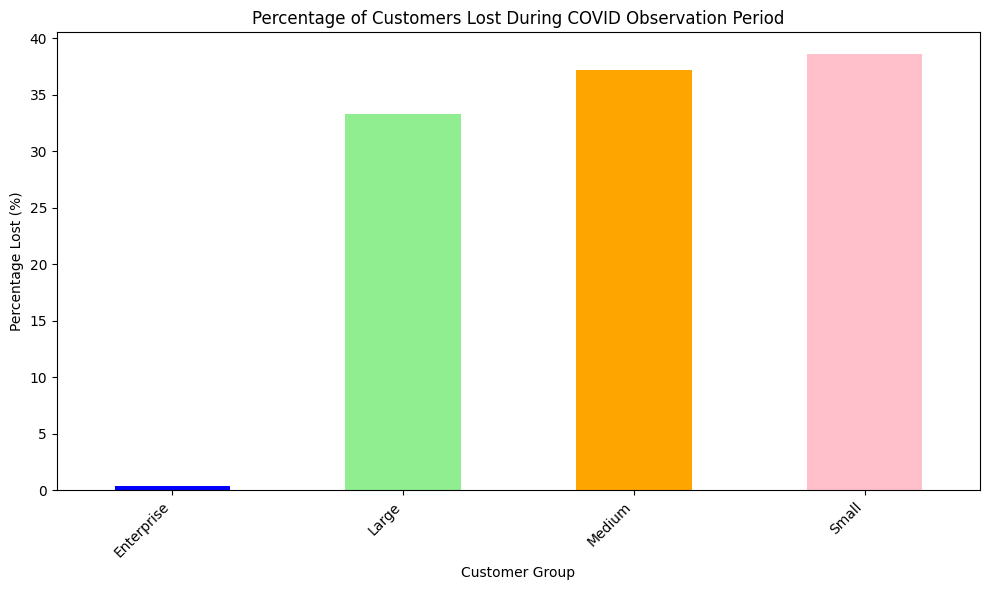

In [ ]:
df = pd.read_csv("COVID_Parcel_Business_with_Growth.csv")

# Filter the data for the COVID observation period (Weeks 11 to 53 of 2020)
covid_data = df[(df['THE_YEAR'] == 2020) & (df['THE_WEEK'].between(11, 53))]

# Calculate the total parcel volume for each customer during the COVID observation period
total_volume_covid = covid_data.groupby('FakeCustomerID')['VOLUME'].sum()

# Compute ISGR for each customer during the COVID observation period
total_volume_2019 = df[(df['THE_YEAR'] == 2019) & (df['THE_WEEK'].between(1, 15))].groupby('FakeCustomerID')['VOLUME'].sum()
ISGR_covid = ((total_volume_covid - total_volume_2019) / total_volume_2019) * 100

# Classify customers as "High Growth" or "Low Growth" during the COVID observation period
covid_data['Growth_Category'] = pd.cut(ISGR_covid, bins=[float('-inf'), 0, float('inf')], labels=['Low Growth', 'High Growth'])

# Group customers by their growth category for the COVID observation period
customers_covid_grouped = covid_data.groupby(['Customer_Group', 'FakeCustomerID'])['Growth_Category'].max()

# Count the number of customers in each group for the COVID observation period
customer_count_covid = customers_covid_grouped.groupby('Customer_Group').size()

# Find the customers lost during the COVID observation period
lost_customers_covid = customers_covid_grouped.reset_index().merge(df[(df['THE_YEAR'] == 2019)][['Customer_Group', 'FakeCustomerID']], on=['Customer_Group', 'FakeCustomerID'], how='left', indicator=True).query('_merge == "left_only"').groupby('Customer_Group').size()

# Calculate the percentage of lost customers for each group during the COVID observation period
percentage_lost_customers_covid = (lost_customers_covid / customer_count_covid) * 100

# Print the percentage of lost customers for each group during the COVID observation period
for group, percentage in percentage_lost_customers_covid.items():
    print("Percentage of COVID observation period customers lost in {}: {:.2f}%".format(group, percentage))

# Define colors for each group
colors = ['blue', 'lightgreen', 'orange', 'pink', 'lightblue']

# Plot the percentage of lost customers for each group during the COVID observation period
plt.figure(figsize=(10, 6))
percentage_lost_customers_covid.plot(kind='bar', color=colors)
plt.title('Percentage of Customers Lost During COVID Observation Period')
plt.xlabel('Customer Group')
plt.ylabel('Percentage Lost (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **Code explanation**
* The total parcel volume for each customer during the COVID observation period is calculated by grouping the covid_data DataFrame by '**FakeCustomerID**' and summing the '**VOLUME**' column. The result is stored in the **total_volume_covid** Series.
* Total parcel volume for each customer during the COVID observation period is compared with the total volume during the same period in 2019 to calculate ISGR (Index of Share Growth Rate). ISGR is calculated as ((total_volume_covid - total_volume_2019) / total_volume_2019) * 100.
* Customers are classified into "**High Growth**" or "**Low Growth**" categories based on their ISGR during the COVID observation period. This is achieved by using **pd.cut()** to bin the ISGR values into two categories.
* Customers are grouped by their growth category ('High Growth' or 'Low Growth') and their 'Customer_Group' and 'FakeCustomerID'. This is stored in the **customers_covid_grouped** DataFrame.
* The number of customers in each growth category for the COVID observation period is counted and stored in the **customer_count_covid** Series.
* Customers lost during the COVID observation period are identified by comparing the customer IDs between the COVID period and the previous year (2019).
* The percentage of lost customers for each group during the COVID observation period is calculated as the ratio of lost customers to the total number of customers in each group, multiplied by 100.
* The percentage of lost customers for each group during the COVID observation period is plotted as a bar chart using **plt.bar()**. Different colors are assigned to each group using the **colors** list.

### (5). What was the overall impact of COVID on volumes and revenue by customer group?

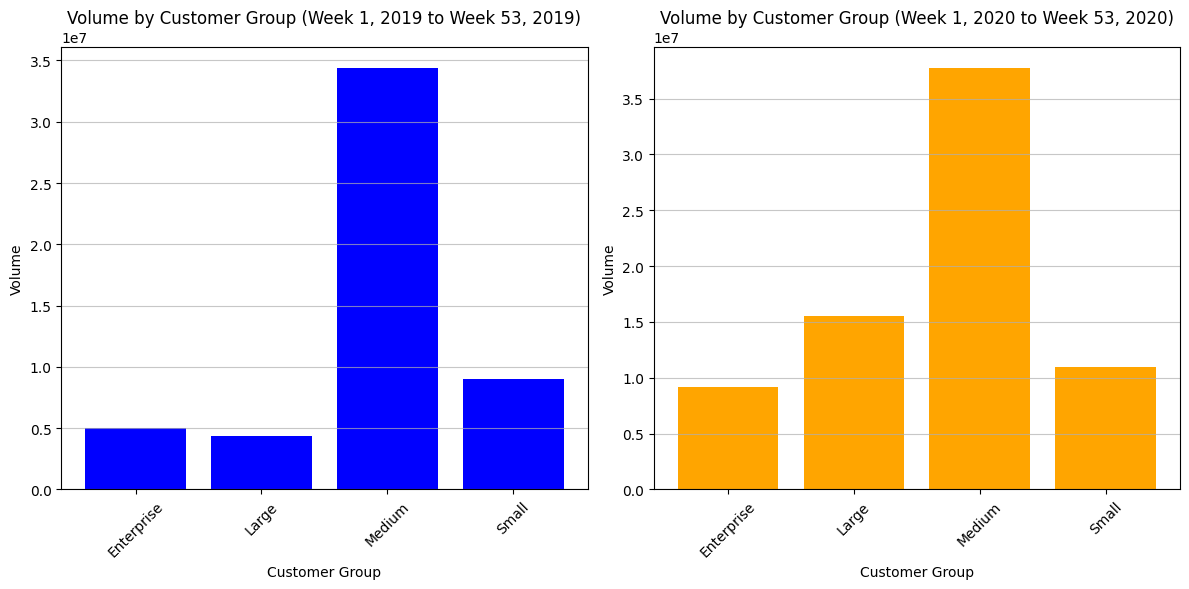

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define the period for 2019
period_2019 = df[(df['THE_YEAR'] == 2019) & (df['THE_WEEK'] >= 1) & (df['THE_WEEK'] <= 53)]

# Define the period for 2020
period_2020 = df[(df['THE_YEAR'] == 2020) & (df['THE_WEEK'] >= 1) & (df['THE_WEEK'] <= 53)]

# Calculate the total volume for each customer group for 2019
volume_by_group_2019 = period_2019.groupby('Customer_Group')['VOLUME'].sum()

# Calculate the total volume for each customer group for 2020
volume_by_group_2020 = period_2020.groupby('Customer_Group')['VOLUME'].sum()

# Calculate the volume difference between 2020 and 2019 for each customer group
volume_difference = volume_by_group_2020 - volume_by_group_2019

# Create a figure and two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot volume by customer group for 2019
axs[0].bar(volume_by_group_2019.index, volume_by_group_2019, color='blue')
axs[0].set_title('Volume by Customer Group (Week 1, 2019 to Week 53, 2019)')
axs[0].set_xlabel('Customer Group')
axs[0].set_ylabel('Volume')
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y', linestyle='-', alpha=0.7)

# Plot volume by customer group for 2020
axs[1].bar(volume_by_group_2020.index, volume_by_group_2020, color='orange')
axs[1].set_title('Volume by Customer Group (Week 1, 2020 to Week 53, 2020)')
axs[1].set_xlabel('Customer Group')
axs[1].set_ylabel('Volume')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y', linestyle='-', alpha=0.7)

# Plot the line representing the volume difference above the bar graph for 2020

plt.tight_layout()
plt.show()


# **Code Explanation:**
* The code defines two periods: one for the year 2019 and another for the year 2020. It filters the DataFrame df to select rows where the year is either 2019 or 2020 and the week falls between 1 and 53 (inclusive) for both years.
* Total parcel volume for each customer group is calculated separately for 2019 and 2020 using **groupby()** on the 'Customer_Group' column and summing the 'VOLUME' column.
* The volume difference between 2020 and 2019 for each customer group is computed by subtracting the total volume for 2019 from the total volume for 2020.
* A figure with two subplots is created using **plt.subplots(1, 2, figsize=(12, 6))**. This creates a figure with two horizontal subplots.
*The total volume for each customer group for 2019 is plotted in the first subplot **(axs[0])** using **bar()** method with blue color.
* Similarly, the total volume for each customer group for 2020 is plotted in the second subplot (axs[1]) using bar() method with orange color.
* Titles, labels, tick parameters, and grid lines are set for both subplots to enhance readability.
* The **plt.tight_layout()** ensures that the subplots are well-arranged, and **plt.show()** displays the plot.

# Dicount the customer based on the conditions

In [ ]:
# Define conditions and corresponding discount rates for each customer group
conditions = {
    'Enterprise': {'min_volume': 500000, 'discount_rate': 0.22},
    'Large': {'min_volume': 200000, 'max_volume': 500000, 'discount_rate': 0.17},
    'Medium': {'min_volume': 10000, 'max_volume': 200000, 'discount_rate': 0.10},
    'Small': {'min_volume': 1000, 'max_volume': 10000, 'discount_rate': 0.04}
}

# Calculate volumes for each year
volumes_2019 = df[df['THE_YEAR'] == 2019].groupby('Customer_Group')['VOLUME'].sum()
volumes_2020 = df[df['THE_YEAR'] == 2020].groupby('Customer_Group')['VOLUME'].sum()

# Define function to apply discounts
def apply_discount(row):
    customer_group = row['Customer_Group']
    volume_2019 = volumes_2019.get(customer_group, 0)
    volume_2020 = volumes_2020.get(customer_group, 0)

    if row['THE_YEAR'] == 2019 or row['THE_YEAR'] == 2020:
        for group, condition in conditions.items():
            min_volume = condition.get('min_volume', None)
            max_volume = condition.get('max_volume', None)
            discount_rate = condition['discount_rate']
            volume = volume_2019  # Using 2019 volume for comparison

            if min_volume is not None and volume >= min_volume:
                if max_volume is None or (max_volume is not None and volume <= max_volume):
                    return row['VOLUME'] * discount_rate
    return 0

# Apply discounts to eligible customers
df['Discount'] = df.apply(apply_discount, axis=1)

# Display the dataframe with discounts applied
print(df[['FakeCustomerID', 'THE_YEAR', 'THE_WEEK', 'VOLUME', 'Customer_Group', 'Discount']])


        FakeCustomerID  THE_YEAR  THE_WEEK  VOLUME Customer_Group  Discount
0               718117      2021         1       8     Enterprise      0.00
1               718117      2020         7     257     Enterprise     56.54
2               718117      2019        39     141     Enterprise     31.02
3               718117      2018         1      14     Enterprise      0.00
4               718117      2021         2     192     Enterprise      0.00
...                ...       ...       ...     ...            ...       ...
190714          228893      2019        13      30     Enterprise      6.60
190715          228893      2019        38     122     Enterprise     26.84
190716          228893      2019        48      99     Enterprise     21.78
190717          228893      2019        20      61     Enterprise     13.42
190718          228893      2019        19      56     Enterprise     12.32

[190719 rows x 6 columns]


# **Code explanation**
* Conditions for each customer group are defined using a dictionary where each key represents a customer group, and the corresponding value is another dictionary containing minimum and maximum volume thresholds along with the discount rate for that group.
* Total volumes for each customer group are calculated separately for the years 2019 and 2020 using **groupby()** on the 'THE_YEAR' and 'Customer_Group' columns and summing the 'VOLUME' column.
* This function takes a row of the DataFrame as input and calculates the discount to be applied based on the defined conditions.
* It retrieves the volumes for the corresponding customer group for both 2019 and 2020.
* Then, it iterates through the defined conditions to find the applicable discount rate based on the 2019 volume.
* If the volume falls within the specified range for a customer group, the discount rate is applied to the volume of that row.
* The **apply_discount** function is applied to each row of the DataFrame using **apply()** along the axis 1 (row-wise).
* Finally, the DataFrame is printed with additional columns including 'FakeCustomerID', 'THE_YEAR', 'THE_WEEK', 'VOLUME', 'Customer_Group', and 'Discount', showing the discount applied for each row.